In [27]:
from ultralytics import YOLO 

model = YOLO('../models/best.pt') 
result = model.predict('../input/image.png', conf=0.1)


image 1/1 c:\Users\LENOVO\Desktop\MsterBD\Datos_no_estructurados\TENIS\TennisBallDetection\trackers\..\input\image.png: 320x640 1 tennis ball, 1403.9ms
Speed: 41.4ms preprocess, 1403.9ms inference, 18.5ms postprocess per image at shape (1, 3, 320, 640)


In [28]:
for box in result[0].boxes:
    result = box.xyxy.tolist()[0]
           

In [29]:
model = YOLO('yolov8x') 
result = model.track('../input/image.png', persist=True)


image 1/1 c:\Users\LENOVO\Desktop\MsterBD\Datos_no_estructurados\TENIS\TennisBallDetection\trackers\..\input\image.png: 320x640 6 persons, 1420.3ms
Speed: 4.6ms preprocess, 1420.3ms inference, 9.9ms postprocess per image at shape (1, 3, 320, 640)


In [30]:
print(result[0].boxes[0])


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9018])
data: tensor([[7.4372e+02, 9.0695e+02, 9.3568e+02, 1.1587e+03, 1.0000e+00, 9.0184e-01, 0.0000e+00]])
id: tensor([1.])
is_track: True
orig_shape: (1204, 2471)
shape: torch.Size([1, 7])
xywh: tensor([[ 839.7046, 1032.8372,  191.9606,  251.7808]])
xywhn: tensor([[0.3398, 0.8578, 0.0777, 0.2091]])
xyxy: tensor([[ 743.7242,  906.9468,  935.6849, 1158.7275]])
xyxyn: tensor([[0.3010, 0.7533, 0.3787, 0.9624]])


In [31]:
result[0].boxes[0].id.tolist()[0]

1.0

In [32]:
result[0].boxes[0].cls.tolist()[0] # class related to player

0.0

In [33]:
result[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [34]:
result[0].names[int(result[0].boxes[0].cls.tolist()[0])]

'person'

In [35]:
import cv2

def read_video(video_path):

    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret: # no more frames to read
            break
        frames.append(frame)
    cap.release()
    return frames

In [36]:
from ball_tracker import BallTracker

input_video_path = "../input/input_video.mp4"
video_frames = read_video(input_video_path)
ball_tracker = BallTracker(model_path='../models/last.pt') 
ball_detections = ball_tracker.detect_frames(video_frames, first_time=False)

In [37]:
ball_detections

[{},
 {1: [893.5889892578125,
   620.5808715820312,
   911.4478149414062,
   639.4649047851562]},
 {},
 {1: [863.1262817382812,
   647.4328002929688,
   881.0003051757812,
   669.0256958007812]},
 {},
 {},
 {1: [820.76220703125,
   686.6580200195312,
   838.1004638671875,
   704.9412841796875]},
 {1: [814.5537109375,
   695.0701293945312,
   831.7039184570312,
   715.1428833007812]},
 {1: [796.8539428710938, 718.937255859375, 815.1022338867188, 738.3896484375]},
 {1: [777.6149291992188, 742.19970703125, 798.7337646484375, 765.240234375]},
 {1: [769.9140625, 757.29052734375, 789.8097534179688, 777.9697265625]},
 {1: [777.1909790039062,
   717.93115234375,
   796.4544067382812,
   738.6070556640625]},
 {1: [790.2625732421875, 671.071533203125, 806.9259033203125, 690.6943359375]},
 {1: [795.106201171875, 647.0358276367188, 812.3492431640625, 667.0322265625]},
 {1: [802.9486083984375,
   605.6130981445312,
   823.0975341796875,
   626.7879638671875]},
 {1: [815.1648559570312, 569.803710937

In [38]:
ball_positions = [x.get(1,[]) for x in ball_detections]
ball_positions

[[],
 [893.5889892578125, 620.5808715820312, 911.4478149414062, 639.4649047851562],
 [],
 [863.1262817382812, 647.4328002929688, 881.0003051757812, 669.0256958007812],
 [],
 [],
 [820.76220703125, 686.6580200195312, 838.1004638671875, 704.9412841796875],
 [814.5537109375, 695.0701293945312, 831.7039184570312, 715.1428833007812],
 [796.8539428710938, 718.937255859375, 815.1022338867188, 738.3896484375],
 [777.6149291992188, 742.19970703125, 798.7337646484375, 765.240234375],
 [769.9140625, 757.29052734375, 789.8097534179688, 777.9697265625],
 [777.1909790039062, 717.93115234375, 796.4544067382812, 738.6070556640625],
 [790.2625732421875, 671.071533203125, 806.9259033203125, 690.6943359375],
 [795.106201171875, 647.0358276367188, 812.3492431640625, 667.0322265625],
 [802.9486083984375, 605.6130981445312, 823.0975341796875, 626.7879638671875],
 [815.1648559570312, 569.8037109375, 831.5535278320312, 587.883544921875],
 [818.8639526367188, 551.044921875, 836.6870727539062, 571.428955078125]

In [39]:
import pandas as pd

df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
df_ball_positions.head()


,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y
0,893.588989,620.580872,911.447815,639.464905,630.022888,630.022888,NaN
1,893.588989,620.580872,911.447815,639.464905,630.022888,630.022888,0.000000
2,878.357635,634.006836,896.224060,654.245300,644.126068,634.723948,4.701060
3,863.126282,647.432800,881.000305,669.025696,658.229248,640.600273,5.876325
4,849.004924,660.507874,866.700358,680.997559,670.752716,646.630762,6.030489


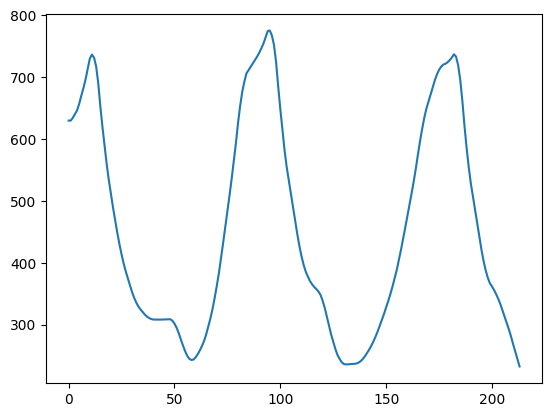

In [20]:
import matplotlib.pyplot as plt

plt.plot(df_ball_positions['mid_y_rolling_mean'])

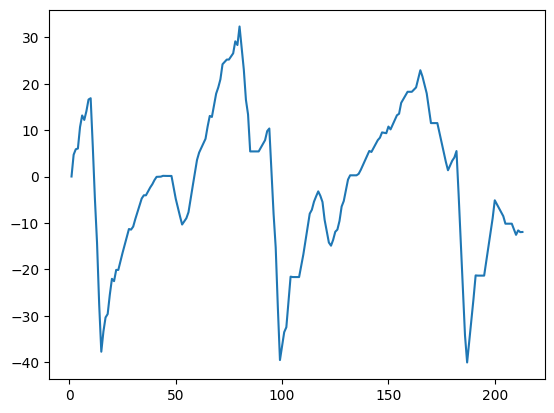

In [40]:
plt.plot(df_ball_positions['delta_y'])

In [42]:
df_ball_positions['ball_hit'] = 0
minimum_change_frames_to_hit = 20

In [15]:
ball_positions = [x.get(1,[]) for x in ball_positions]

In [43]:
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_to_hit*1.2)): # buffer 20%
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_to_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

    
            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1

        if change_count > minimum_change_frames_to_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20032\3616048147.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20032\3616048147.py:18: SettingWithCopy

In [48]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,893.588989,620.580872,911.447815,639.464905,630.022888,630.022888,NaN,0
1,893.588989,620.580872,911.447815,639.464905,630.022888,630.022888,0.000000,0
2,878.357635,634.006836,896.224060,654.245300,644.126068,634.723948,4.701060,0
3,863.126282,647.432800,881.000305,669.025696,658.229248,640.600273,5.876325,0
4,849.004924,660.507874,866.700358,680.997559,670.752716,646.630762,6.030489,0
...,...,...,...,...,...,...,...,...
209,1185.122131,247.756355,1199.984009,263.518623,255.637489,280.774131,-11.369016,0
210,1183.748291,232.741348,1196.233765,246.201157,239.471252,268.205810,-12.568321,0
211,1183.952026,227.024139,1195.753906,241.133331,234.078735,256.592928,-11.612882,0
212,1180.722046,214.752228,1193.211670,229.305405,222.028816,244.604004,-11.988924,0


In [47]:
df_ball_positions[df_ball_positions['ball_hit'] != 0]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.190979,717.931152,796.454407,738.607056,728.269104,736.677832,6.493890,1
58,926.298560,241.519016,938.252966,253.408029,247.463522,243.117392,-2.007844,1
95,624.163757,749.882904,641.725708,768.786896,759.334900,775.641581,1.160185,1
131,717.092194,230.554092,728.783020,242.333336,236.443714,235.929995,-0.659837,1
182,1296.539062,741.766296,1312.786377,758.375244,750.070770,737.231818,5.486853,1


In [50]:
frame_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()
frame_ball_hits

[11, 58, 95, 131, 182]